HOUSE PRICE PREDICTION 


In [ ]:
# Import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# importing the chennai house price dataset
house_price_dataset = pd.read_csv("/content/train-chennai-sale.csv")

In [ ]:
print(house_price_dataset)

       PRTID        AREA  INTSQFT    DATESALE  DISTMAINROAD  NBEDROOM  \
0     P03210  Karapakkam     1004  04-05-2011           131       1.0   
1     P09411  Anna Nagar     1986  19-12-2006            26       2.0   
2     P01812       Adyar      909  04-02-2012            70       1.0   
3     P05346   Velachery     1855  13-03-2010            14       3.0   
4     P06210  Karapakkam     1226  05-10-2009            84       1.0   
...      ...         ...      ...         ...           ...       ...   
7104  P03834  Karapakkam      598  03-01-2011            51       1.0   
7105  P10000   Velachery     1897  08-04-2004            52       3.0   
7106  P09594   Velachery     1614  25-08-2006           152       2.0   
7107  P06508  Karapakkam      787  03-08-2009            40       1.0   
7108  P09794   Velachery     1896  13-07-2005           156       3.0   

      NBATHROOM  NROOM     SALECOND PARKFACIL  ... UTILITYAVAIL     STREET  \
0           1.0      3     AbNormal       Yes

In [ ]:
# loading the daatset to a pandas dataframe

house_price_dataframe = pd.DataFrame(house_price_dataset)

In [ ]:
house_price_dataframe.head()

,PRTID,AREA,INTSQFT,DATESALE,DISTMAINROAD,NBEDROOM,NBATHROOM,NROOM,SALECOND,PARKFACIL,...,UTILITYAVAIL,STREET,MZZONE,QSROOMS,QSBATHROOM,QSBEDROOM,QSOVERALL,REGFEE,COMMIS,SALESPRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
# Checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(7109, 22)

In [ ]:
# statistical measures of the dataset
house_price_dataframe.describe()

,INTSQFT,DISTMAINROAD,NBEDROOM,NBATHROOM,NROOM,QSROOMS,QSBATHROOM,QSBEDROOM,QSOVERALL,REGFEE,COMMIS,SALESPRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
house_price_dataframe.isnull().sum()

PRTID            0
AREA             0
INTSQFT          0
DATESALE         0
DISTMAINROAD     0
NBEDROOM         1
NBATHROOM        5
NROOM            0
SALECOND         0
PARKFACIL        0
DATEBUILD        0
BUILDTYPE        0
UTILITYAVAIL     0
STREET           0
MZZONE           0
QSROOMS          0
QSBATHROOM       0
QSBEDROOM        0
QSOVERALL       48
REGFEE           0
COMMIS           0
SALESPRICE       0
dtype: int64

TAKING CARE OF MISSING VALUES BY IMPUTATION - MEAN, MEDIAN, MODE



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


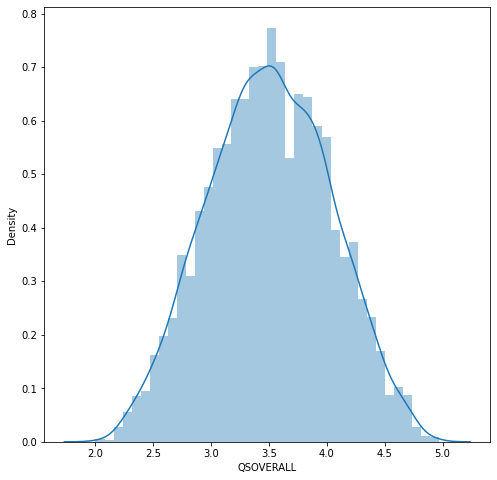

In [ ]:
# analyse the distribution of data in the QSOVERALL column
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(house_price_dataframe.QSOVERALL)

In [ ]:
house_price_dataframe['QSOVERALL'].fillna(house_price_dataframe['QSOVERALL'].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


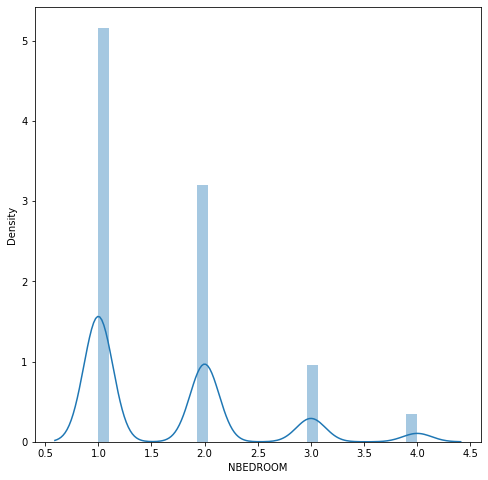

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(house_price_dataframe.NBEDROOM)

In [ ]:
house_price_dataframe['NBEDROOM'].fillna(house_price_dataframe['NBEDROOM'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


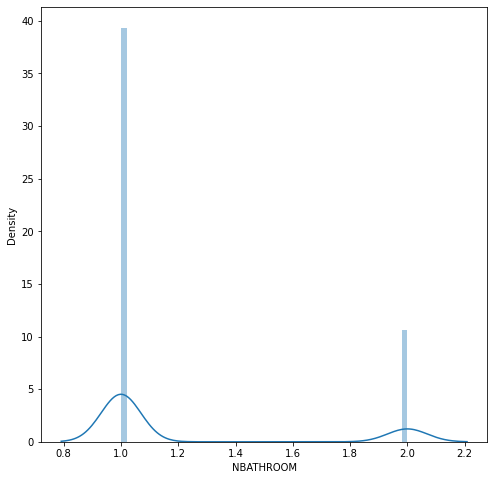

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(house_price_dataframe.NBATHROOM)

In [ ]:
house_price_dataframe['NBATHROOM'].fillna(house_price_dataframe['NBATHROOM'].median(),inplace=True)

In [ ]:
house_price_dataframe.isnull().sum()

PRTID           0
AREA            0
INTSQFT         0
DATESALE        0
DISTMAINROAD    0
NBEDROOM        0
NBATHROOM       0
NROOM           0
SALECOND        0
PARKFACIL       0
DATEBUILD       0
BUILDTYPE       0
UTILITYAVAIL    0
STREET          0
MZZONE          0
QSROOMS         0
QSBATHROOM      0
QSBEDROOM       0
QSOVERALL       0
REGFEE          0
COMMIS          0
SALESPRICE      0
dtype: int64

In [ ]:
correlation = house_price_dataframe.corr()

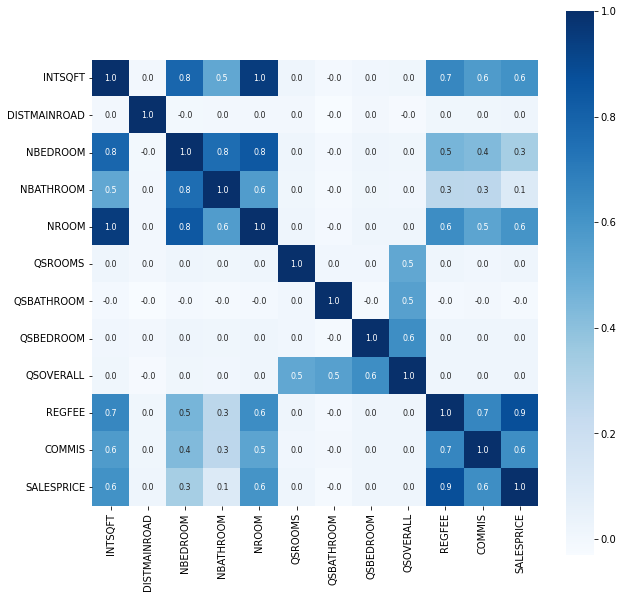

In [ ]:
# constructing a heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and price

In [ ]:
from locale import YESEXPR
X = house_price_dataframe.drop(['SALESPRICE'],axis = 1)
Y = house_price_dataframe['SALESPRICE']

In [ ]:
print(X)
print(Y)

       PRTID        AREA  INTSQFT    DATESALE  DISTMAINROAD  NBEDROOM  \
0     P03210  Karapakkam     1004  04-05-2011           131       1.0   
1     P09411  Anna Nagar     1986  19-12-2006            26       2.0   
2     P01812       Adyar      909  04-02-2012            70       1.0   
3     P05346   Velachery     1855  13-03-2010            14       3.0   
4     P06210  Karapakkam     1226  05-10-2009            84       1.0   
...      ...         ...      ...         ...           ...       ...   
7104  P03834  Karapakkam      598  03-01-2011            51       1.0   
7105  P10000   Velachery     1897  08-04-2004            52       3.0   
7106  P09594   Velachery     1614  25-08-2006           152       2.0   
7107  P06508  Karapakkam      787  03-08-2009            40       1.0   
7108  P09794   Velachery     1896  13-07-2005           156       3.0   

      NBATHROOM  NROOM     SALECOND PARKFACIL  ...   BUILDTYPE UTILITYAVAIL  \
0           1.0      3     AbNormal       Ye

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7109, 21) (5687, 21) (1422, 21)


In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(X,Y):
  X_train, X_test, Y_train,Y_test = train_test_split(X,Y,random_state=42)
  model.fit(X_train,Y_train)

  pred=model.predict(X_test)

  cv_score = cross_val_score(model,X,Y,scoring = 'neg_mean_squared_error', cv =5)
  cv_score = np.abs(np.mean(cv_score))

  print("Model report")
  print("MSE:" , mean_squared_error(Y_test, pred))
  print("CV Score", cv_score)


In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

ValueError: ignored

In [ ]:
training_data_prediction = model.predict(X_train)

ValueError: ignored

In [ ]:
print(training_data_prediction)

NameError: ignored

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error: ", score_1)
print("Mean absolute error: ", score_2)

NameError: ignored

VISUALIZING THE ACTUAL PRICES AND THE PREDICT PRICES


In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

NameError: ignored

PREDICTION ON TEST DATA

In [ ]:
test_data_prediction = model.predict(X_test)


ValueError: ignored

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error: ", score_1)
print("Mean absolute error: ", score_2)

NameError: ignored